# Project Part 1 - Scratch

In [15]:
# Read Fashion MNIST dataset

import util_mnist_reader
X_train, y_train = util_mnist_reader.load_mnist('../data/fashion', kind='train')
X_test, y_test = util_mnist_reader.load_mnist('../data/fashion', kind='t10k')

# Your code goes here . . .

X_train = X_train / 255
X_test = X_test / 255


In [16]:
# Import Statements and one hot encoding

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
encoded = np.zeros((60000, 10))

for i in range(60000):
    encoded[i, y_train[i]] = 1


In [17]:
# Initialize here

hidden_nodes = 100 # no of hidden nodes
weight_l1 = np.random.normal(0, 1, [784, hidden_nodes]) 
weight_l2 = np.random.normal(0, 1, [hidden_nodes, 10]) 

l_rate = 0.5
bias_l1 = np.zeros((hidden_nodes,))
bias_l2 = np.zeros((10,))

epochs = 1000

def sigmoid(z):
    ans = 1/(1 + np.exp(-z.astype(float)))
    return ans

def softmax(z):
    temp = np.exp(z - np.max(z, axis = 1, keepdims = True))
    return temp / np.sum(temp, axis = 1, keepdims = True)

def s_der(x):
    return x*(1-x)


In [18]:
loss_values = []
acc_track = []

# Neural network impementation
for epoch in range(epochs):
    
    a_1 = sigmoid(np.dot(weight_l1.T,X_train.T).T+bias_l1).T
    a_2 = softmax(np.dot(weight_l2.T,a_1).T+bias_l2).T
    
#     print(a_1.shape)
#     print(a_2.shape)
    
    error_y = (a_2.T-encoded)/60000
#     print(error_y.shape)
    dw_2 = np.dot(error_y.T,a_1.T)
    weight_l2 -=l_rate * dw_2.T
    bias_l2 -= l_rate * np.sum(error_y,axis=0)
    
    b = np.multiply(np.dot(error_y,weight_l2.T),s_der(a_1.T))
    dw_1 = np.dot(b.T,X_train)
    weight_l1 -=l_rate * dw_1.T
    bias_l1 -= l_rate*np.sum(b,axis=0)
    
    pred = []
    result = a_2.T
    for x in result:
        pred.append(np.argmax(x))
    acc = (y_train == pred).mean()
    
    loss = np.sum(np.multiply(-encoded,np.log(a_2.T)))/60000
    print(f"Epoch: {epoch}, Loss: {loss}, Accuracy: {acc}")
    loss_values.append(loss)
    acc_track.append(acc)


Epoch: 0, Loss: 11.957035615822706, Accuracy: 0.07061666666666666
Epoch: 1, Loss: 7.444483817404262, Accuracy: 0.13963333333333333
Epoch: 2, Loss: 5.79072172204001, Accuracy: 0.18721666666666667
Epoch: 3, Loss: 4.772830768841275, Accuracy: 0.19056666666666666
Epoch: 4, Loss: 4.067039131241722, Accuracy: 0.24185
Epoch: 5, Loss: 3.563533853982367, Accuracy: 0.25933333333333336
Epoch: 6, Loss: 3.2678153811718946, Accuracy: 0.2857166666666667
Epoch: 7, Loss: 3.0551826955814514, Accuracy: 0.3143666666666667
Epoch: 8, Loss: 2.88139681851916, Accuracy: 0.3383833333333333
Epoch: 9, Loss: 2.735074415185975, Accuracy: 0.3622166666666667
Epoch: 10, Loss: 2.6089229091128434, Accuracy: 0.3823666666666667
Epoch: 11, Loss: 2.4981438710512687, Accuracy: 0.40075
Epoch: 12, Loss: 2.3994354155014816, Accuracy: 0.41678333333333334
Epoch: 13, Loss: 2.310514053721672, Accuracy: 0.43146666666666667
Epoch: 14, Loss: 2.2298197063794927, Accuracy: 0.4452
Epoch: 15, Loss: 2.156268693413669, Accuracy: 0.458283333

Epoch: 132, Loss: 0.8834042369313232, Accuracy: 0.7104666666666667
Epoch: 133, Loss: 0.8814303169447204, Accuracy: 0.7110333333333333
Epoch: 134, Loss: 0.8794790860544287, Accuracy: 0.7116333333333333
Epoch: 135, Loss: 0.877550113850954, Accuracy: 0.7123166666666667
Epoch: 136, Loss: 0.8756429801002378, Accuracy: 0.71275
Epoch: 137, Loss: 0.8737572744355543, Accuracy: 0.71315
Epoch: 138, Loss: 0.8718925960730542, Accuracy: 0.7136
Epoch: 139, Loss: 0.8700485535478997, Accuracy: 0.7141833333333333
Epoch: 140, Loss: 0.8682247644681154, Accuracy: 0.7146166666666667
Epoch: 141, Loss: 0.8664208552835183, Accuracy: 0.71515
Epoch: 142, Loss: 0.8646364610673547, Accuracy: 0.7157333333333333
Epoch: 143, Loss: 0.8628712253085449, Accuracy: 0.7162666666666667
Epoch: 144, Loss: 0.8611247997127355, Accuracy: 0.7167
Epoch: 145, Loss: 0.8593968440106229, Accuracy: 0.7171833333333333
Epoch: 146, Loss: 0.8576870257722918, Accuracy: 0.7175333333333334
Epoch: 147, Loss: 0.855995020226568, Accuracy: 0.7178

Epoch: 263, Loss: 0.7308323054537034, Accuracy: 0.7508833333333333
Epoch: 264, Loss: 0.7301220870518953, Accuracy: 0.7509333333333333
Epoch: 265, Loss: 0.7294157670932725, Accuracy: 0.7511
Epoch: 266, Loss: 0.7287133091864934, Accuracy: 0.75145
Epoch: 267, Loss: 0.7280146774354265, Accuracy: 0.7515666666666667
Epoch: 268, Loss: 0.7273198364332407, Accuracy: 0.75185
Epoch: 269, Loss: 0.7266287512565488, Accuracy: 0.75205
Epoch: 270, Loss: 0.7259413874595889, Accuracy: 0.75235
Epoch: 271, Loss: 0.725257711068446, Accuracy: 0.7526666666666667
Epoch: 272, Loss: 0.7245776885752918, Accuracy: 0.7528833333333333
Epoch: 273, Loss: 0.7239012869326439, Accuracy: 0.7531
Epoch: 274, Loss: 0.7232284735476435, Accuracy: 0.7532833333333333
Epoch: 275, Loss: 0.7225592162763279, Accuracy: 0.7534833333333333
Epoch: 276, Loss: 0.721893483417916, Accuracy: 0.75375
Epoch: 277, Loss: 0.7212312437090806, Accuracy: 0.7539166666666667
Epoch: 278, Loss: 0.7205724663182195, Accuracy: 0.7541
Epoch: 279, Loss: 0.7

Epoch: 394, Loss: 0.661806239710188, Accuracy: 0.7722333333333333
Epoch: 395, Loss: 0.6614148874034806, Accuracy: 0.77245
Epoch: 396, Loss: 0.6610250256339743, Accuracy: 0.7725833333333333
Epoch: 397, Loss: 0.6606366449794111, Accuracy: 0.7726833333333334
Epoch: 398, Loss: 0.660249736091442, Accuracy: 0.7727833333333334
Epoch: 399, Loss: 0.6598642896950467, Accuracy: 0.77295
Epoch: 400, Loss: 0.6594802965879536, Accuracy: 0.7730333333333334
Epoch: 401, Loss: 0.6590977476400555, Accuracy: 0.77305
Epoch: 402, Loss: 0.6587166337928312, Accuracy: 0.7732
Epoch: 403, Loss: 0.6583369460587652, Accuracy: 0.7732833333333333
Epoch: 404, Loss: 0.6579586755207708, Accuracy: 0.77345
Epoch: 405, Loss: 0.6575818133316108, Accuracy: 0.7735833333333333
Epoch: 406, Loss: 0.6572063507133227, Accuracy: 0.7737
Epoch: 407, Loss: 0.6568322789566445, Accuracy: 0.7739166666666667
Epoch: 408, Loss: 0.6564595894204429, Accuracy: 0.7740833333333333
Epoch: 409, Loss: 0.6560882735311413, Accuracy: 0.77415
Epoch: 41

Epoch: 525, Loss: 0.6204907741682517, Accuracy: 0.7845166666666666
Epoch: 526, Loss: 0.6202355507391388, Accuracy: 0.7845666666666666
Epoch: 527, Loss: 0.6199810354416163, Accuracy: 0.7846666666666666
Epoch: 528, Loss: 0.6197272247419446, Accuracy: 0.7847166666666666
Epoch: 529, Loss: 0.6194741151312344, Accuracy: 0.7848
Epoch: 530, Loss: 0.6192217031252398, Accuracy: 0.7849333333333334
Epoch: 531, Loss: 0.6189699852641586, Accuracy: 0.7849666666666667
Epoch: 532, Loss: 0.6187189581124288, Accuracy: 0.785
Epoch: 533, Loss: 0.6184686182585298, Accuracy: 0.7851
Epoch: 534, Loss: 0.6182189623147826, Accuracy: 0.78515
Epoch: 535, Loss: 0.617969986917153, Accuracy: 0.7852333333333333
Epoch: 536, Loss: 0.6177216887250568, Accuracy: 0.7852666666666667
Epoch: 537, Loss: 0.6174740644211634, Accuracy: 0.7854
Epoch: 538, Loss: 0.6172271107112032, Accuracy: 0.7854333333333333
Epoch: 539, Loss: 0.6169808243237768, Accuracy: 0.78555
Epoch: 540, Loss: 0.6167352020101627, Accuracy: 0.7855333333333333


Epoch: 655, Loss: 0.5922168929313184, Accuracy: 0.793
Epoch: 656, Loss: 0.592031043744667, Accuracy: 0.7930333333333334
Epoch: 657, Loss: 0.5918455934246654, Accuracy: 0.7930833333333334
Epoch: 658, Loss: 0.5916605404143407, Accuracy: 0.79315
Epoch: 659, Loss: 0.5914758831653649, Accuracy: 0.7932666666666667
Epoch: 660, Loss: 0.5912916201379946, Accuracy: 0.7933166666666667
Epoch: 661, Loss: 0.591107749801011, Accuracy: 0.7933333333333333
Epoch: 662, Loss: 0.5909242706316572, Accuracy: 0.79335
Epoch: 663, Loss: 0.5907411811155816, Accuracy: 0.79335
Epoch: 664, Loss: 0.5905584797467783, Accuracy: 0.7933666666666667
Epoch: 665, Loss: 0.5903761650275273, Accuracy: 0.79345
Epoch: 666, Loss: 0.5901942354683368, Accuracy: 0.7935333333333333
Epoch: 667, Loss: 0.5900126895878871, Accuracy: 0.79365
Epoch: 668, Loss: 0.589831525912972, Accuracy: 0.7937166666666666
Epoch: 669, Loss: 0.5896507429784442, Accuracy: 0.7937666666666666
Epoch: 670, Loss: 0.5894703393271566, Accuracy: 0.7937833333333333

Epoch: 787, Loss: 0.5706384766446564, Accuracy: 0.7994333333333333
Epoch: 788, Loss: 0.5704944475479622, Accuracy: 0.7995333333333333
Epoch: 789, Loss: 0.570350668540008, Accuracy: 0.7995333333333333
Epoch: 790, Loss: 0.5702071388195082, Accuracy: 0.79965
Epoch: 791, Loss: 0.5700638575887627, Accuracy: 0.79975
Epoch: 792, Loss: 0.56992082405363, Accuracy: 0.7998166666666666
Epoch: 793, Loss: 0.5697780374235083, Accuracy: 0.7998333333333333
Epoch: 794, Loss: 0.5696354969113113, Accuracy: 0.7999333333333334
Epoch: 795, Loss: 0.5694932017334451, Accuracy: 0.7999666666666667
Epoch: 796, Loss: 0.5693511511097894, Accuracy: 0.8001
Epoch: 797, Loss: 0.5692093442636723, Accuracy: 0.8001166666666667
Epoch: 798, Loss: 0.569067780421851, Accuracy: 0.8002333333333334
Epoch: 799, Loss: 0.5689264588144897, Accuracy: 0.8002166666666667
Epoch: 800, Loss: 0.5687853786751367, Accuracy: 0.8002833333333333
Epoch: 801, Loss: 0.5686445392407055, Accuracy: 0.8004166666666667
Epoch: 802, Loss: 0.5685039397514

Epoch: 915, Loss: 0.5539949787930856, Accuracy: 0.80565
Epoch: 916, Loss: 0.5538774687377757, Accuracy: 0.8056833333333333
Epoch: 917, Loss: 0.5537601291344166, Accuracy: 0.80575
Epoch: 918, Loss: 0.5536429595038329, Accuracy: 0.8057666666666666
Epoch: 919, Loss: 0.5535259593686032, Accuracy: 0.8058166666666666
Epoch: 920, Loss: 0.5534091282530533, Accuracy: 0.8058333333333333
Epoch: 921, Loss: 0.5532924656832487, Accuracy: 0.80585
Epoch: 922, Loss: 0.5531759711869866, Accuracy: 0.8058333333333333
Epoch: 923, Loss: 0.5530596442937875, Accuracy: 0.8059166666666666
Epoch: 924, Loss: 0.5529434845348895, Accuracy: 0.80595
Epoch: 925, Loss: 0.5528274914432392, Accuracy: 0.806
Epoch: 926, Loss: 0.5527116645534857, Accuracy: 0.8060333333333334
Epoch: 927, Loss: 0.5525960034019713, Accuracy: 0.8060333333333334
Epoch: 928, Loss: 0.5524805075267267, Accuracy: 0.8060666666666667
Epoch: 929, Loss: 0.5523651764674609, Accuracy: 0.8060166666666667
Epoch: 930, Loss: 0.5522500097655573, Accuracy: 0.80

Text(0,0.5,'Loss_Scratch')

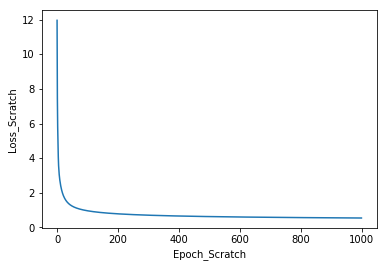

In [19]:
# plot loss

plt.plot(loss_values)
plt.xlabel("Epoch_Scratch")
plt.ylabel("Loss_Scratch")

Text(0,0.5,'Accuracy_Scratch')

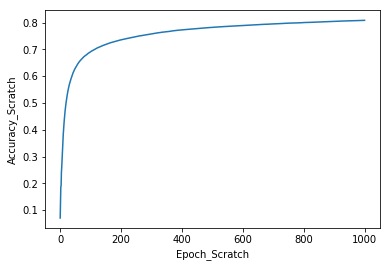

In [20]:
# Plot Accuracy
plt.plot(acc_track)
plt.xlabel("Epoch_Scratch")
plt.ylabel("Accuracy_Scratch")

In [21]:
# TESTING SET
z_1 = (np.dot(weight_l1.T, X_test.T).T + bias_l1).T
a_1 = sigmoid(z_1)
z_2 = (np.dot(weight_l2.T, a_1).T + bias_l2).T
a_2 = softmax(z_2)

prediction = []
r = a_2.T
for i in r:
        prediction.append(np.argmax(i))
accuracy = (y_test==prediction).mean()

print(f"Testing Accuracy : {accuracy * 100}")

Testing Accuracy : 72.42


In [22]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, prediction)

print(conf_matrix)

test_precision = np.mean(np.diag(conf_matrix) / np.sum(conf_matrix, axis = 0)) * 100
test_recall = np.mean(np.diag(conf_matrix) / np.sum(conf_matrix, axis = 1)) * 100
print(f"Testing Precision is {round(test_precision,2)}%")
print(f"Testing recall is {round(test_recall, 2)}%")

[[346   2  66  72  15   1 489   0   9   0]
 [  1 863  33  72  15   0  13   0   3   0]
 [  2   0 763  12 133   0  86   0   3   1]
 [  5   3  39 796  74   0  76   0   7   0]
 [  0   1 214  20 709   0  53   0   3   0]
 [  2   0  66   4   8 576  21 143  59 121]
 [ 29   0 230  37 152   0 540   0  12   0]
 [  0   0   2   1   1   7   7 845   9 128]
 [  2   0  59  12  23   1  53   6 841   3]
 [  0   0   7   2   0   1   5  19   3 963]]
Testing Precision is 77.02%
Testing recall is 72.42%


# Project Part 2 - Keras

In [23]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

D:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [24]:
# Read the data

import util_mnist_reader
X_train, y_train = util_mnist_reader.load_mnist('../data/fashion', kind='train')
X_test, y_test = util_mnist_reader.load_mnist('../data/fashion', kind='t10k')

X_train = np.reshape(X_train, [60000, 28, 28])
X_test = np.reshape(X_test, [10000, 28, 28])

X_train = X_train / 255.0
X_test = X_test / 255.0

In [25]:
# Keras- flatten the input. then do dense function

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(10, activation = 'softmax'),
])
# compiles here
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [26]:
# Training starts here
neural_network = model.fit(X_train, y_train, epochs = 20)

Epoch 1/20
60000/60000 [==============================] - 2s 38us/sample - loss: 0.5434 - acc: 0.8130
Epoch 2/20
60000/60000 [==============================] - 2s 37us/sample - loss: 0.3907 - acc: 0.8587
Epoch 3/20
60000/60000 [==============================] - 2s 37us/sample - loss: 0.3555 - acc: 0.8711
Epoch 4/20
60000/60000 [==============================] - 2s 35us/sample - loss: 0.3314 - acc: 0.8801
Epoch 5/20
60000/60000 [==============================] - 2s 35us/sample - loss: 0.3129 - acc: 0.8865
Epoch 6/20
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2990 - acc: 0.8900
Epoch 7/20
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2851 - acc: 0.8940
Epoch 8/20
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2742 - acc: 0.8988
Epoch 9/20
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2646 - acc: 0.9013
Epoch 10/20
60000/60000 [==============================] - 2s 36us/sample - loss: 

In [27]:
y_pred = model.predict(X_test)

bob = []
for x in y_pred:
    bob.append(np.argmax(x))
    
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, bob)

print(conf_matrix)

[[863   2  14  19   3   1  90   0   8   0]
 [  5 966   1  20   3   0   2   0   3   0]
 [ 18   1 846  13  65   0  55   0   2   0]
 [ 26   3  12 918  17   1  20   0   3   0]
 [  2   0 120  47 768   0  59   0   4   0]
 [  0   0   0   1   0 966   0  17   2  14]
 [136   1 103  31  52   0 666   0  11   0]
 [  0   0   0   0   0  16   0 958   0  26]
 [  5   0   5   4   3   2   4   3 974   0]
 [  0   0   0   0   0  11   1  31   0 957]]


Text(0,0.5,'Accuracy_Keras')

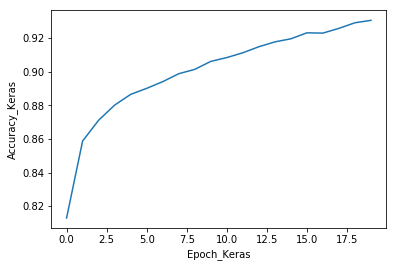

In [28]:
# Plot accuracy vs epochs

plt.plot(neural_network.history['acc'])
plt.xlabel("Epoch_Keras")
plt.ylabel("Accuracy_Keras")

Text(0,0.5,'Loss_Keras')

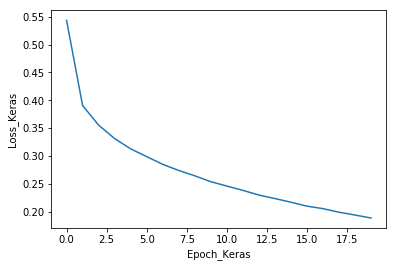

In [29]:
# plot loss vs epochs

plt.plot(neural_network.history['loss'])
plt.xlabel("Epoch_Keras")
plt.ylabel("Loss_Keras")

In [30]:
# Testing Evaluation

testing_loss, testing_accuracy = model.evaluate(X_test, y_test, verbose = 1)

print(f"Testing accuracy = {testing_accuracy * 100}")

10000/10000 [==============================] - 0s 22us/sample - loss: 0.3232 - acc: 0.8882
Testing accuracy = 88.81999850273132


# KERAS CNN - PART 3

In [31]:
from keras.models import Sequential
from keras.layers import Dense, Activation

X_train_cnn = X_train
y_train_cnn = y_train

X_train_cnn = np.reshape(X_train_cnn, (X_train_cnn.shape[0], 28, 28, 1))

print(X_train_cnn.shape)

# Add the CNN layers - Maxpooling, and perform relu on each layer.
model_cnn = keras.models.Sequential()
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(28, 28, 1)))
model_cnn.add(keras.layers.MaxPooling2D(2, 2))
model_cnn.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
model_cnn.add(keras.layers.MaxPooling2D(2, 2))
model_cnn.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(64, activation='relu'))
model_cnn.add(keras.layers.Dense(10, activation = 'softmax'))

model_cnn.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

Using TensorFlow backend.


(60000, 28, 28, 1)


In [32]:
# Training starts here

neural_cnn = model_cnn.fit(X_train_cnn, y_train_cnn, epochs = 10)

Epoch 1/10
60000/60000 [==============================] - 22s 373us/sample - loss: 1.0131 - acc: 0.6348
Epoch 2/10
60000/60000 [==============================] - 22s 359us/sample - loss: 0.5575 - acc: 0.7921
Epoch 3/10
60000/60000 [==============================] - 21s 355us/sample - loss: 0.4767 - acc: 0.8236
Epoch 4/10
60000/60000 [==============================] - 22s 361us/sample - loss: 0.4297 - acc: 0.8430
Epoch 5/10
60000/60000 [==============================] - 22s 373us/sample - loss: 0.3952 - acc: 0.8557
Epoch 6/10
60000/60000 [==============================] - 22s 360us/sample - loss: 0.3727 - acc: 0.8644
Epoch 7/10
60000/60000 [==============================] - 21s 355us/sample - loss: 0.3536 - acc: 0.8701
Epoch 8/10
60000/60000 [==============================] - 21s 354us/sample - loss: 0.3392 - acc: 0.8765
Epoch 9/10
60000/60000 [==============================] - 21s 358us/sample - loss: 0.3262 - acc: 0.8813
Epoch 10/10
60000/60000 [==============================] - 21s 3

Text(0,0.5,'Accuracy_CNN')

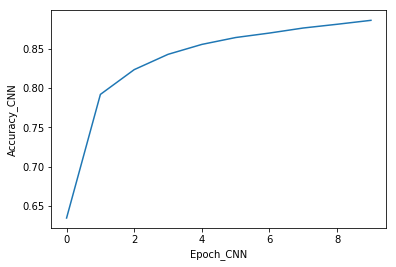

In [33]:
# plot accuracy vs epochs
plt.plot(neural_cnn.history['acc'])
plt.xlabel("Epoch_CNN")
plt.ylabel("Accuracy_CNN")

Text(0,0.5,'Loss_CNN')

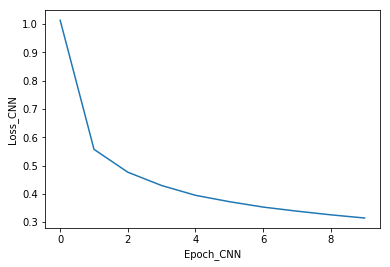

In [34]:
# plot loss vs epochs
plt.plot(neural_cnn.history['loss'])
plt.xlabel("Epoch_CNN")
plt.ylabel("Loss_CNN")

In [35]:
y_pred = model.predict(X_test)

bob = []
for x in y_pred:
    bob.append(np.argmax(x))
    
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, bob)

print(conf_matrix)

[[863   2  14  19   3   1  90   0   8   0]
 [  5 966   1  20   3   0   2   0   3   0]
 [ 18   1 846  13  65   0  55   0   2   0]
 [ 26   3  12 918  17   1  20   0   3   0]
 [  2   0 120  47 768   0  59   0   4   0]
 [  0   0   0   1   0 966   0  17   2  14]
 [136   1 103  31  52   0 666   0  11   0]
 [  0   0   0   0   0  16   0 958   0  26]
 [  5   0   5   4   3   2   4   3 974   0]
 [  0   0   0   0   0  11   1  31   0 957]]


In [36]:
X_test_cnn = X_test
X_test_cnn = np.reshape(X_test_cnn, (X_test_cnn.shape[0], 28, 28, 1))

test_cnn_loss, test_cnn_acc = model_cnn.evaluate(X_test_cnn, y_test, verbose = 1)

print(f"Testing accuracy for CNN = {test_cnn_acc * 100}")

10000/10000 [==============================] - 1s 110us/sample - loss: 0.3360 - acc: 0.8801
Testing accuracy for CNN = 88.01000118255615
